## Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or(other)


In [2]:
# Import some necessary library

import sklearn
from sklearn.datasets import make_circles

In [3]:
# Make 1000 sample
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [4]:
import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "Label":y})
circles.head()

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


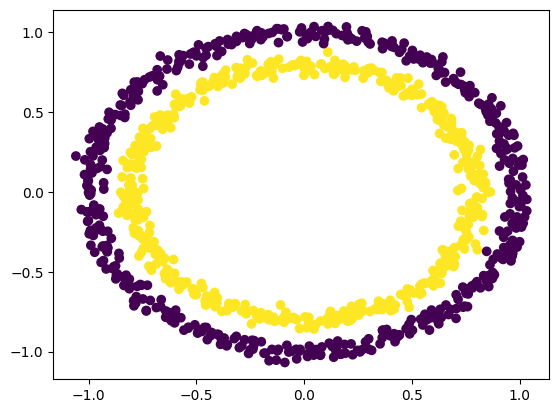

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            )

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

### 1.2 Turn the data into Tensors and create train and test splits

In [7]:
import torch
torch.__version__


'2.1.0+cu121'

In [8]:
type(X)

numpy.ndarray

In [9]:
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)
X,Y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [10]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

##  2. Building a model
To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator(GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test **loop**


In [11]:
import torch
from torch import nn

# Make device agonstic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Module` layers capable of handling the shapes of our data
3. Define a forward() method tha outlines the forward pass
4. Instantiate an instance of our model class and send it to the target device

In [12]:
# 1. consturct our model from nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 `nn.Module` layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=128)
    self.layer_2 = nn.Linear(in_features=128,
                             out_features=1)
  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))

# 4. instantiate an instant of our model class and send it to the target device
model_0 = CircleModelV0().to(device)


In [13]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1140, -0.6481],
                      [ 0.3947, -0.1670],
                      [ 0.1035,  0.4555],
                      [ 0.1460,  0.6027],
                      [ 0.0278,  0.2608],
                      [-0.3179, -0.1387],
                      [-0.0678, -0.0027],
                      [ 0.3062, -0.3920],
                      [-0.2476, -0.1842],
                      [ 0.0394, -0.1956],
                      [ 0.6173,  0.0788],
                      [ 0.5661,  0.6241],
                      [ 0.3951,  0.4227],
                      [ 0.4155,  0.1607],
                      [-0.0539, -0.4770],
                      [-0.1316,  0.5788],
                      [-0.2808,  0.0444],
                      [ 0.3081,  0.4193],
                      [-0.1057,  0.2234],
                      [ 0.3326, -0.0553],
                      [-0.1275, -0.2117],
                      [ 0.5139,  0.6577],
                      [-0.3902, -0.2154],
  

In [14]:
 # different way(simple) to create a model with nn.suqential()
 model_1 = nn.Sequential(nn.Linear(in_features=1, out_features=10),
                         nn.Linear(in_features=10, out_features=1)).to(device)

In [15]:
model_1

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE

For classificationi we usually use binary corss entropy or categorical coss entropy(coss entropy)

For our commom choices of loss function and optimizer

* For the loss function,  we're going to use `torch.nn.L1Loss()`(Regression) and `tor.nn.BCEWitehLogitLoss()`(Classification)

* For the optimizer, we're going to use `torch.nn.SGD()` and `torch.nn.Adam()`


In [16]:
# Setup the loss function
# You also can choose this code: loss_fn = nn.BCELoss()
# But the `nn.BCEWithLogitLoss()` is better with numercial stability,
# because this fucntion combinded by sigmiod ativation

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.0001)

In [17]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [18]:
device


'cuda'

## 3. Train model

To train out model, we're going to need to build a training loop with the following steps:

1. Foward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward (back propagation)
5. optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to **raw logits**.

We can convert the logits into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for classification and softmax for multicalss classifiction).

Then we can convert out model's prediction probabilities into **prediction labels** by either rounding them.

In [19]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device)[:5])

In [20]:
y_logits

tensor([[-0.0936],
        [-0.2849],
        [ 0.3016],
        [-0.2052],
        [ 0.1330]], device='cuda:0')

In [21]:
# Use the sigmoid activation function on our logits to turn them into prefiction probablities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs = torch.round(y_pred_probs)

For our prediction probability values, we need to perform a range-sytle rounding on them


In [22]:
# Find the predicted labels(logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

In [23]:
# Check for equality
print(torch.eq(y_pred_probs.squeeze(),y_pred_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


### 3.2 Building a traning and test loop

In [24]:
device

'cuda'

In [25]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [26]:
X_train.squeeze()

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [27]:
torch.cuda.manual_seed(42)

# Put the turn the data into device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building the model
epochs = 1000
for epoch in range(epochs):

  ### TRAINING
  # 1. forward pass
  model_0.train()
  train_logits = model_0(X_train).squeeze()
  train_pred = torch.round(torch.sigmoid(train_logits))

  # 2. calculate the loss
  # Note: here, we should put the raw logits on our loss function, becasue we used the BCEWithLogitsLoss(),
  # If you used the BCELoss() as your loss function, you can put the predicted probabilities on your loss function.
  # How to calculate the predicted probabilities: torch.sigmoid(model_0(X_train))
  train_loss = loss_fn(train_logits,
                       y_train)
  train_acc = accuracy_fn(y_true=y_train,
                          y_pred=train_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. backward pass
  train_loss.backward()

  # 5. optimizer step
  optimizer.step()


  ###TESTING
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print the result of trained mode
  if epoch % 100 == 0:
    print(f"Epoch:{epoch}\n | train loss:{train_loss:0.5f} | train_accuracy:{train_acc}%\n | test_loss = {test_loss:0.5f} | test_accuracy:{test_acc}%")



Epoch:0
 | train loss:0.70388 | train_accuracy:49.25%
 | test_loss = 0.69293 | test_accuracy:54.0%
Epoch:100
 | train loss:0.70344 | train_accuracy:49.25%
 | test_loss = 0.69273 | test_accuracy:54.0%
Epoch:200
 | train loss:0.70302 | train_accuracy:49.25%
 | test_loss = 0.69255 | test_accuracy:54.0%
Epoch:300
 | train loss:0.70261 | train_accuracy:49.25%
 | test_loss = 0.69238 | test_accuracy:54.0%
Epoch:400
 | train loss:0.70222 | train_accuracy:49.25%
 | test_loss = 0.69223 | test_accuracy:54.0%
Epoch:500
 | train loss:0.70185 | train_accuracy:49.25%
 | test_loss = 0.69208 | test_accuracy:54.0%
Epoch:600
 | train loss:0.70149 | train_accuracy:49.375%
 | test_loss = 0.69194 | test_accuracy:54.0%
Epoch:700
 | train loss:0.70114 | train_accuracy:49.125%
 | test_loss = 0.69182 | test_accuracy:54.0%
Epoch:800
 | train loss:0.70081 | train_accuracy:49.125%
 | test_loss = 0.69170 | test_accuracy:54.0%
Epoch:900
 | train loss:0.70050 | train_accuracy:49.125%
 | test_loss = 0.69160 | test_acc

## 4. Visualize, Visualize, Visualize!


From the metrics, it looks like our model isn't learning anything

So to inspect it, let's visualize!

To do so, we're going to imprort a function called `helper_function`



In [28]:
import requests
from pathlib import Path

# Download helper functions from the repo
if Path("helper_functions.py").is_file():
  print("helper_functions is already exists, skipping...")
else:
  print("Downloading repo")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


In [29]:
from helper_functions import plot_predictions, plot_decision_boundary

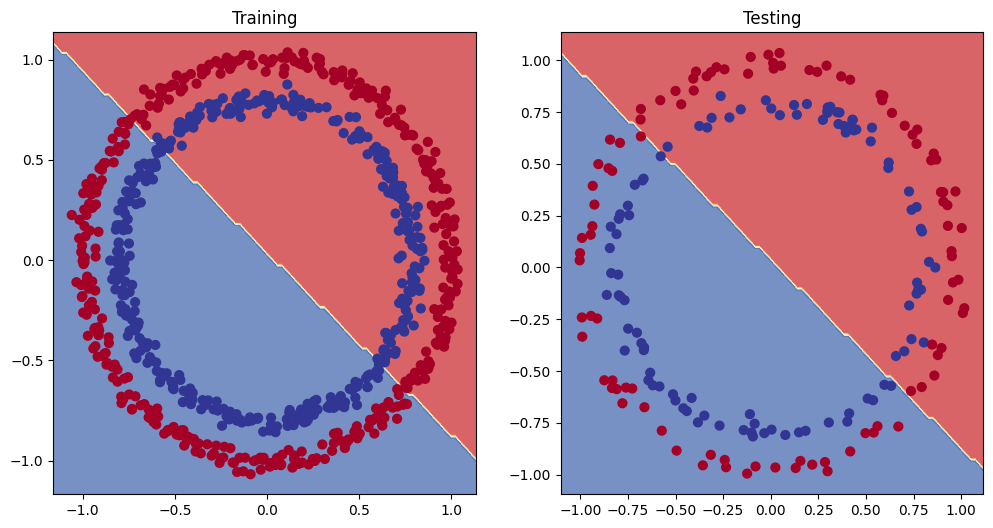

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improveing a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's prespective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are refered as **hyperparameters**

Let's try improve our model by:

* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 ->3
* Increase the number of epochs: 100 -> 1000

In [31]:
#Buildig the model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_2 = CircleModelV1()
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
# Setup the loss function
## Don't need to set any parameters on the loss function, just choose a algorithm for model
loss_fn = nn.BCEWithLogitsLoss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


In [33]:
X_train


tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]], device='cuda:0')

In [34]:
model_2.to(device)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:

epochs = 1000

# Put data on the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


for epoch in range(epochs):
  ###TRAINING
  model_2.train()

  # 1. Forward Pass
  train_logits_v2 = model_2(X_train).squeeze()
  train_pred_v2 = torch.round(torch.sigmoid(train_logits_v2))

  # 2. Calculate the loss
  train_loss_v2 = loss_fn(train_logits_v2,
                       y_train)
  train_acc_v2 = accuracy_fn(y_true=y_train,
                          y_pred=train_pred_v2)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. back propagation
  train_loss_v2.backward()

  # 5. optimizer step
  optimizer.step()

###Testing
  model_2.eval()
  with torch.inference_mode():
    test_logits_v2 = model_2(X_test).squeeze()
    test_pred_v2 = torch.round(torch.sigmoid(test_logits_v2))
    test_loss_v2 = loss_fn(test_logits_v2, y_test)
    test_acc_v2 = accuracy_fn(y_true=y_test,
                              y_pred=test_pred_v2)

  if epoch % 100 == 0:
    print(f"epoch:{epoch} | train loss:{train_loss_v2} | train accuracy:{train_acc_v2} \n| test loss:{test_loss_v2} | test accuracy:{test_acc_v2}")



epoch:0 | train loss:0.6966665387153625 | train accuracy:48.5 
| test loss:0.6957290768623352 | test accuracy:46.0
epoch:100 | train loss:0.6930596828460693 | train accuracy:50.375 
| test loss:0.695167064666748 | test accuracy:48.0
epoch:200 | train loss:0.6929855346679688 | train accuracy:51.125 
| test loss:0.6948422193527222 | test accuracy:47.0
epoch:300 | train loss:0.6929802298545837 | train accuracy:51.0 
| test loss:0.6947271823883057 | test accuracy:45.5
epoch:400 | train loss:0.6929798722267151 | train accuracy:51.24999999999999 
| test loss:0.6946929693222046 | test accuracy:46.0
epoch:500 | train loss:0.6929798722267151 | train accuracy:51.125 
| test loss:0.694683313369751 | test accuracy:46.0
epoch:600 | train loss:0.6929798722267151 | train accuracy:51.125 
| test loss:0.6946806311607361 | test accuracy:46.0
epoch:700 | train loss:0.6929798722267151 | train accuracy:51.0 
| test loss:0.694679856300354 | test accuracy:46.0
epoch:800 | train loss:0.6929798722267151 | trai

In [36]:
test_logits_v2.shape,y_test.shape

(torch.Size([200]), torch.Size([200]))

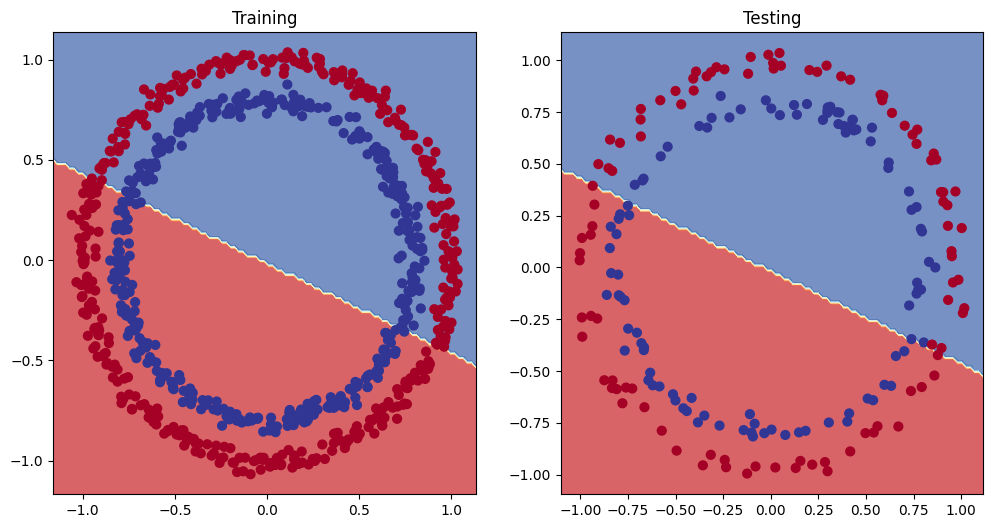

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_2, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

In [38]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [39]:
train_split = int(len(X_regression) * 0.8)
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

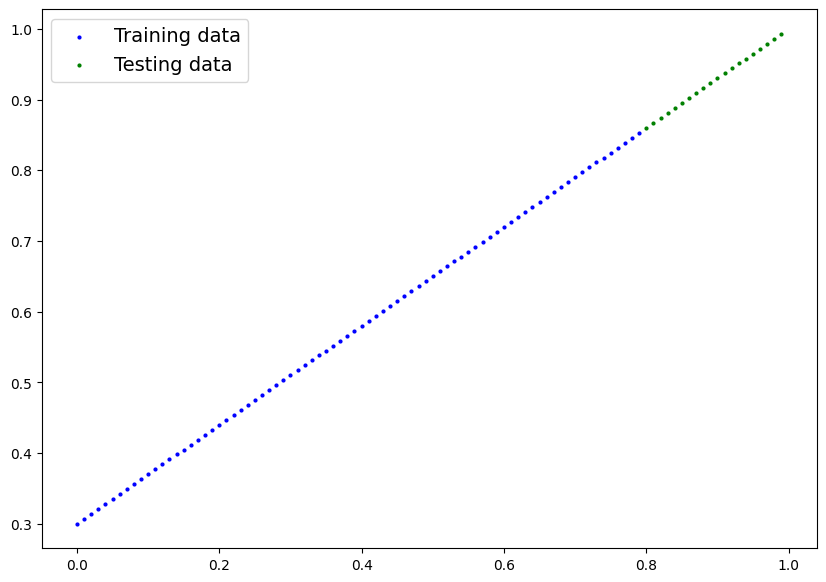

In [40]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_2` to fit a straight line

In [41]:
#same architecture as model_2
model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

In [42]:
# set the loss funtion and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.001)

In [43]:
# create a loop to training

epochs = 1000

# Put our data on the target device
X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)

#Create a loop
for epoch in range(epochs):
  model_3.train()
  train_pred = model_3(X_train_regression)
  train_loss = loss_fn(train_pred, y_train_regression)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  ###Testing
  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Let's take a loop how the model are trained
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:0.5f} | Test Loss: {test_loss:0.5f}" )




Epoch: 0 | Train Loss: 0.79877 | Test Loss: 1.14185
Epoch: 100 | Train Loss: 0.46840 | Test Loss: 0.77598
Epoch: 200 | Train Loss: 0.12955 | Test Loss: 0.36374
Epoch: 300 | Train Loss: 0.09894 | Test Loss: 0.24676
Epoch: 400 | Train Loss: 0.09366 | Test Loss: 0.22664
Epoch: 500 | Train Loss: 0.08853 | Test Loss: 0.21429
Epoch: 600 | Train Loss: 0.08332 | Test Loss: 0.20158
Epoch: 700 | Train Loss: 0.07802 | Test Loss: 0.18879
Epoch: 800 | Train Loss: 0.07260 | Test Loss: 0.17509
Epoch: 900 | Train Loss: 0.06705 | Test Loss: 0.16029


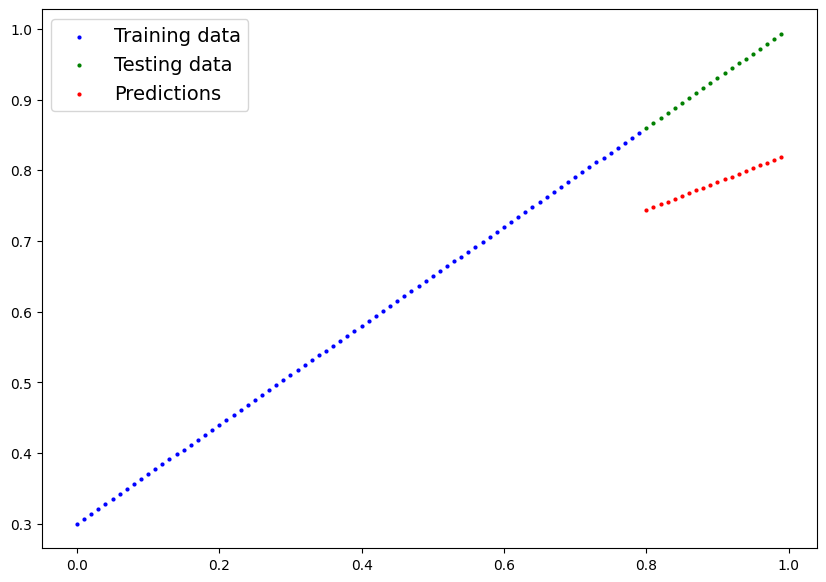

In [44]:
# Turn 0n evaluation mode
model_3.eval()

# Make predictions(inference)
with torch.inference_mode():
  y_preds = model_3(X_test_regression)


# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. Practice using non-linerity mdoel

### 6.1 Create some circle data

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)





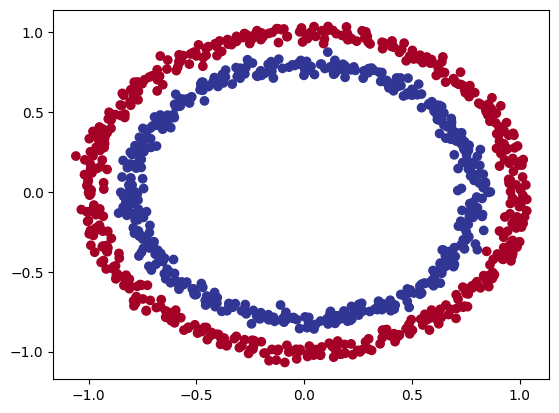

In [46]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [47]:
# Convert data to tensor and train model
import torch
from sklearn.model_selection import train_test_split

# At first, I use this method by my side
#X = torch.tensor(X).type(torch.float)
#y = torch.tensor(y).type(torch.float)

# But there still is other method is that(the tensors shares the same memory as numpy array):
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

### 6.2 Building a model with non-linearity
* Linear = straight line
* Non-Linear = non-Straight lines

Artifical neural networks are com

In [48]:
# Build a model with non-linear activation
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_4 = CircleModelV2().to(device)
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [49]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr = 0.1)

### 6.3 Training a model with non_linearity


In [50]:
# put the data on the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Loop through the data
epochs = 10000

for epoch in range(epochs):
  #Training
  model_4.train()
  train_logits = model_4(X_train).squeeze()
  train_preds = torch.round(torch.sigmoid(train_logits))
  train_loss = loss_fn(train_logits,y_train) # Remember that, BCEWithLogitLoss() put  `logits` as input
  train_acc = accuracy_fn(y_true=y_train, y_pred=train_preds)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  # Print the loss of different epochs
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Train Loss:{train_loss:0.5f} | Train Accuracy:{train_acc:0.2f} | Test Loss: {test_loss:0.5f} | Test Accuracy: {test_acc:0.2f}")

Epoch:0 | Train Loss:0.69464 | Train Accuracy:49.29 | Test Loss: 0.69469 | Test Accuracy: 50.00
Epoch:100 | Train Loss:0.69011 | Train Accuracy:52.57 | Test Loss: 0.69242 | Test Accuracy: 50.33
Epoch:200 | Train Loss:0.68609 | Train Accuracy:53.00 | Test Loss: 0.68905 | Test Accuracy: 51.67
Epoch:300 | Train Loss:0.68056 | Train Accuracy:57.43 | Test Loss: 0.68452 | Test Accuracy: 54.00
Epoch:400 | Train Loss:0.67261 | Train Accuracy:70.57 | Test Loss: 0.67809 | Test Accuracy: 67.00
Epoch:500 | Train Loss:0.66107 | Train Accuracy:71.14 | Test Loss: 0.66851 | Test Accuracy: 70.00
Epoch:600 | Train Loss:0.64312 | Train Accuracy:73.29 | Test Loss: 0.65245 | Test Accuracy: 74.67
Epoch:700 | Train Loss:0.61079 | Train Accuracy:82.29 | Test Loss: 0.62205 | Test Accuracy: 81.00
Epoch:800 | Train Loss:0.54996 | Train Accuracy:87.00 | Test Loss: 0.56686 | Test Accuracy: 85.33
Epoch:900 | Train Loss:0.46015 | Train Accuracy:91.43 | Test Loss: 0.48523 | Test Accuracy: 88.33
Epoch:1000 | Train Los

### 6.4 Visualize the performance of model with `plot_decision_boundary`

Resource Website: https://madewithml.com/courses/foundations/neural-networks/

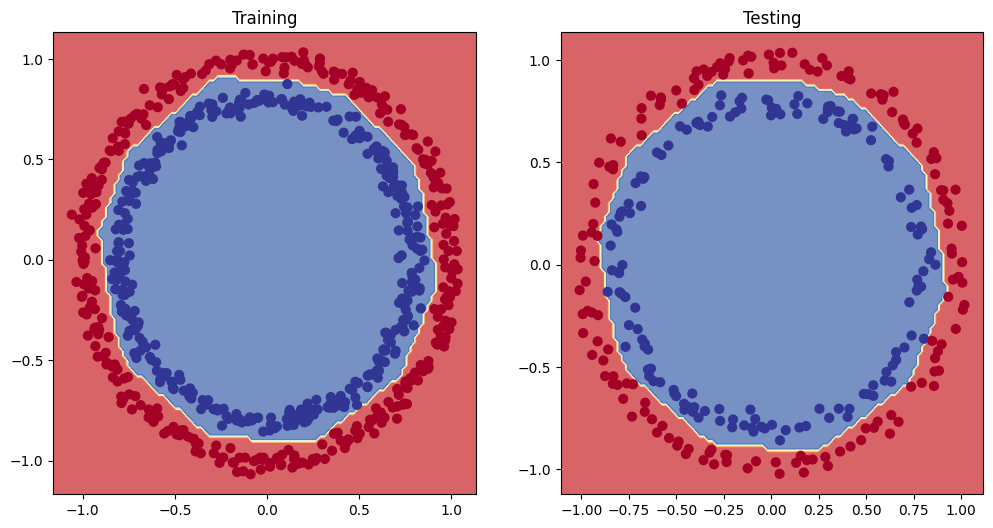

In [51]:
# Use the decision boundary library
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_4, X_test, y_test)

## 7. Replicating non-linear activation fucntion



In [52]:
from torch import tensor

In [53]:
A = torch.arange(-10,10,1,dtype=torch.float)


In [54]:
A.dtype

torch.float32

In [55]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

In [56]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

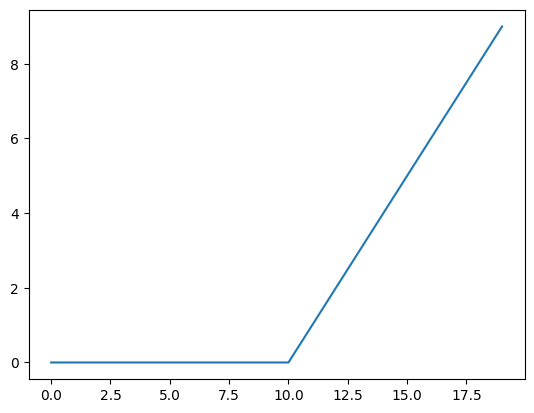

In [57]:
plt.plot(relu(A))

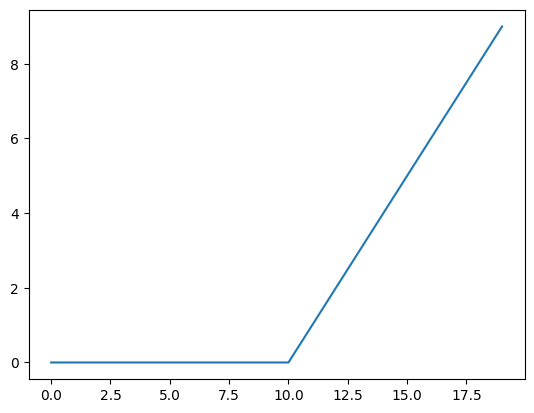

In [58]:
plt.plot(torch.relu(A))

In [59]:
# Now let's try to replicate on sigmoid
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

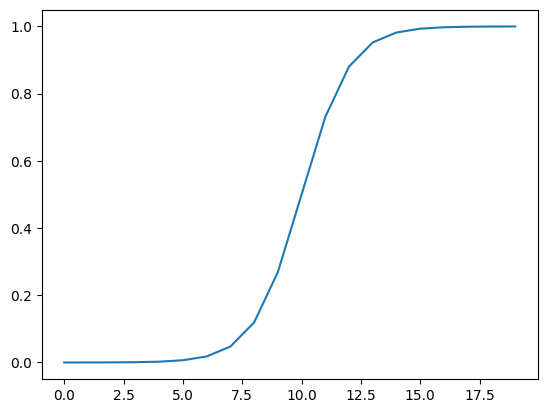

In [60]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

### 8.1 Creating a toy multi-class dataset

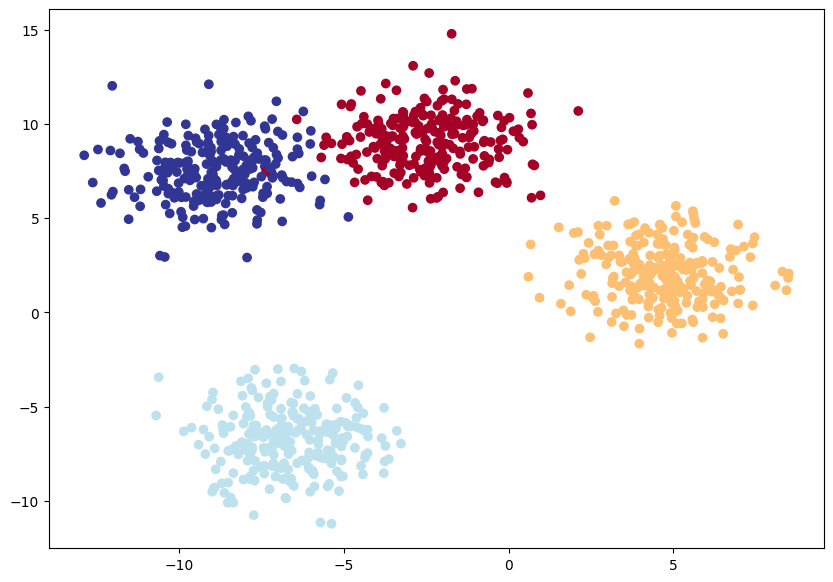

In [104]:
# Import dependencies

import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


N_SAMPLES = 1000
NUM_CLASS = 4
NUM_FEATURE = 2
RANDOM_STATE = 42

# Create the data with make_blobs()
X_blob, y_blob = make_blobs(n_samples= N_SAMPLES,
                            centers=NUM_CLASS,
                            n_features=NUM_FEATURE,
                            cluster_std=1.5,
                            random_state=RANDOM_STATE)

# Split the data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_STATE)
# convert the data from numpy to tensor
X_blob_train = torch.from_numpy(X_blob_train).type(torch.float)
X_blob_test = torch.from_numpy(X_blob_test).type(torch.float)
y_blob_train = torch.from_numpy(y_blob_train).type(torch.LongTensor)
y_blob_test = torch.from_numpy(y_blob_test).type(torch.LongTensor)


# Visualize, Visualize, Visualize!
plt.figure(figsize=[10,7])
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Build a multi-class classifition model

In [105]:
# Create device agonstic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [106]:
device

'cuda'

In [107]:
# Build the model
class BlodModel(nn.Module):
  def __init__(self, intput_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=intput_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)


# Create an instance of BlodModel and send it to the target device
model_5 = BlodModel(intput_features=2,
                    output_features=4,
                    hidden_units=10).to(device)

### 8.3 Create the loss function and optimizer for our model



In [108]:
# Create the loss function for the model
loss_fn = nn.CrossEntropyLoss()

# Create the optimizer for the model
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probilities for multi-class PyTorch model

In order to evaluate, train ang test our model, we need to convert our model's output to probabilities and then to prediction labels.

Logits(raw output of the model) - Pred Probs(use `torch.softmax()` to get the probs of each class) - Pred labels(use `torch.argmax()`)

In [109]:
model_5.eval()
with torch.inference_mode():
  y_logits = model_5(X_blob_test.to(device))
y_logits

tensor([[-8.8992e-02, -5.8235e-02,  5.0671e-01,  2.1012e-01],
        [ 1.8826e-01,  1.7460e-01,  6.7483e-01,  3.2305e-01],
        [-3.2104e-01, -8.5688e-01, -4.4086e-01,  9.3918e-01],
        [-8.9274e-03,  2.1805e-01,  3.8494e-01,  5.9144e-02],
        [-5.6896e-02, -2.6919e-01,  1.1828e+00,  6.4070e-01],
        [ 2.7136e-01,  1.8537e-01,  7.2256e-01,  3.8307e-01],
        [-1.6782e-01, -6.9839e-01, -5.3209e-01,  9.6141e-01],
        [-3.4210e-02, -1.1078e-01,  1.0640e+00,  5.1035e-01],
        [-2.9369e-01, -9.8423e-01, -3.2858e-01,  1.0777e+00],
        [-5.1764e-02, -1.6492e-01,  1.0918e+00,  5.4751e-01],
        [-1.4794e-02, -2.3703e-02,  9.8739e-01,  4.3322e-01],
        [-8.4829e-02, -1.0004e-02,  4.8684e-01,  1.6740e-01],
        [-5.7068e-02, -2.3597e-01,  1.1870e+00,  6.2830e-01],
        [-2.3730e-02, -1.7344e-01,  1.2079e+00,  6.1411e-01],
        [-2.2559e-02, -2.2082e-01,  1.2922e+00,  6.7924e-01],
        [ 1.1190e-01,  1.6863e-01,  7.5681e-01,  3.0365e-01],
        

In [110]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs

tensor([[0.1925, 0.1985, 0.3493, 0.2596],
        [0.2102, 0.2073, 0.3419, 0.2405],
        [0.1667, 0.0976, 0.1479, 0.5879],
        [0.2080, 0.2610, 0.3084, 0.2226],
        [0.1375, 0.1112, 0.4750, 0.2762],
        [0.2171, 0.1992, 0.3409, 0.2428],
        [0.1860, 0.1094, 0.1292, 0.5754],
        [0.1504, 0.1393, 0.4510, 0.2593],
        [0.1561, 0.0782, 0.1507, 0.6150],
        [0.1459, 0.1303, 0.4580, 0.2657],
        [0.1592, 0.1578, 0.4338, 0.2492],
        [0.1947, 0.2098, 0.3449, 0.2506],
        [0.1372, 0.1147, 0.4759, 0.2722],
        [0.1393, 0.1199, 0.4773, 0.2636],
        [0.1323, 0.1085, 0.4925, 0.2668],
        [0.1932, 0.2045, 0.3682, 0.2341],
        [0.2146, 0.2078, 0.3356, 0.2420],
        [0.2063, 0.1531, 0.2157, 0.4250],
        [0.1859, 0.1867, 0.3972, 0.2302],
        [0.2485, 0.2256, 0.2744, 0.2515],
        [0.1769, 0.1904, 0.4063, 0.2264],
        [0.1642, 0.1663, 0.4163, 0.2532],
        [0.2110, 0.2676, 0.2925, 0.2288],
        [0.1954, 0.1294, 0.1548, 0

In [111]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3,
        3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3,
        3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2,
        3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2,
        2, 2, 3, 2, 2, 2, 3, 2], device='cuda:0')

In [112]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testin loop for a multi-class classification


In [115]:
# Set number of epochs
epochs = 1000

# Put the date to our target device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ###Training
  model_5.train()
  train_logits = model_5(X_blob_train)
  train_pred = torch.softmax(train_logits, dim=1).argmax(dim=1)
  train_loss = loss_fn(train_logits, y_blob_train)
  train_acc = accuracy_fn(y_true=y_blob_train,
                          y_pred = train_pred)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  ###Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred = test_pred)

  # print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | train loss:{train_loss:0.5f} | train accuracy:{train_acc} | test loss:{test_loss:0.5f} | test accuracy:{test_acc}")

Epoch:0 | train loss:0.02279 | train accuracy:99.375 | test loss:0.01208 | test accuracy:99.5
Epoch:100 | train loss:0.02257 | train accuracy:99.375 | test loss:0.01185 | test accuracy:99.5
Epoch:200 | train loss:0.02236 | train accuracy:99.375 | test loss:0.01162 | test accuracy:99.5
Epoch:300 | train loss:0.02215 | train accuracy:99.375 | test loss:0.01140 | test accuracy:99.5
Epoch:400 | train loss:0.02196 | train accuracy:99.375 | test loss:0.01118 | test accuracy:99.5
Epoch:500 | train loss:0.02177 | train accuracy:99.375 | test loss:0.01098 | test accuracy:99.5
Epoch:600 | train loss:0.02158 | train accuracy:99.375 | test loss:0.01080 | test accuracy:99.5
Epoch:700 | train loss:0.02141 | train accuracy:99.375 | test loss:0.01061 | test accuracy:99.5
Epoch:800 | train loss:0.02123 | train accuracy:99.375 | test loss:0.01043 | test accuracy:99.5
Epoch:900 | train loss:0.02106 | train accuracy:99.375 | test loss:0.01025 | test accuracy:99.5


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [119]:
# Make predictions
model_5.eval()
with torch.inference_mode():
  y_logits = model_5(X_blob_test)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)




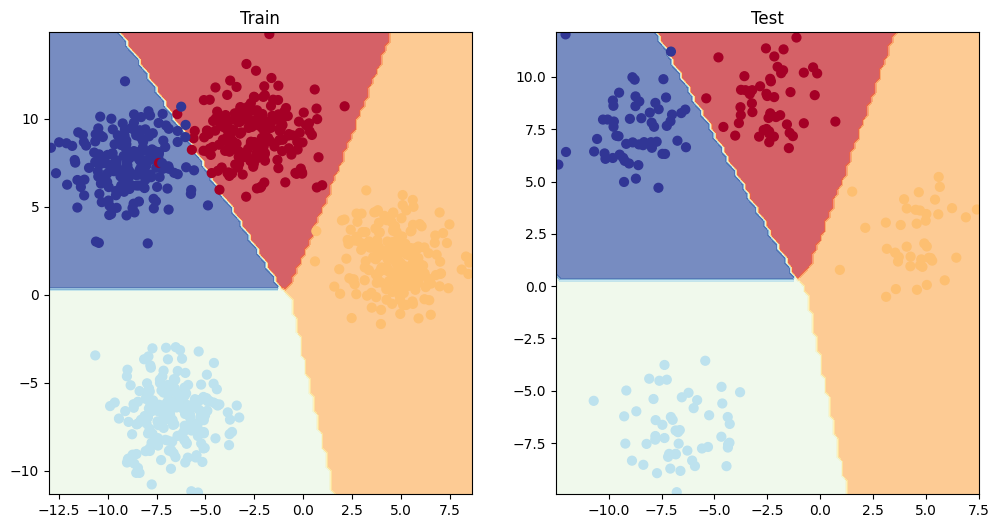

In [124]:
plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)


## 9. A few more classification metrics

* Accuracy
* Precision
* Recall
* F1 - score
* Confusion Matrix
* Classification report


In [125]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 5.4 MB/s eta 0:00:00


In [131]:
from torchmetrics import Accuracy

# Setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_pred, y_blob_test)

tensor(0.9950, device='cuda:0')